In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.utils import shuffle 
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.utils import to_categorical    

In [2]:
datagen = ImageDataGenerator(rescale=1./255,
                            validation_split = 0.1,
                                    horizontal_flip=False,
                                    )


In [3]:
train_image = datagen.flow_from_directory(
        "../input/devnagri-script-classification/Data/Train",
        target_size=(64, 64),
        batch_size=360,
        subset='training',
        shuffle = True,
        class_mode='categorical')

Found 70380 images belonging to 46 classes.


In [4]:
print(train_image)

In [5]:
val_image = datagen.flow_from_directory(
        "../input/devnagri-script-classification/Data/Train",
        target_size=(64, 64),
        batch_size=360,
        shuffle = True,
        subset='validation',
        class_mode='categorical')

Found 7820 images belonging to 46 classes.


In [6]:
img, lab = next(iter(train_image))
img.shape, lab.shape

((360, 64, 64, 3), (360, 46))

In [7]:
class_indices = train_image.class_indices
len(class_indices)

46

In [8]:
def create_model(activation='relu', optimizer='adam', kernel_initializer='he_normal'):
    
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(64, 64, 3), activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32, activation= activation, kernel_initializer=kernel_initializer, kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(46, activation='softmax'))

    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

In [9]:
model = create_model()    


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [10]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [11]:
history = model.fit(train_image, epochs=10, verbose=1, validation_data = val_image, shuffle=True)

2022-01-07 15:15:28.765837: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
196/196 [==============================] - 239s 1s/step - loss: 1.8915 - accuracy: 0.6830 - val_loss: 2.9503 - val_accuracy: 0.1380
Epoch 2/10
196/196 [==============================] - 202s 1s/step - loss: 0.6427 - accuracy: 0.9152 - val_loss: 1.7181 - val_accuracy: 0.6092
Epoch 3/10
196/196 [==============================] - 203s 1s/step - loss: 0.4196 - accuracy: 0.9464 - val_loss: 0.8854 - val_accuracy: 0.8150
Epoch 4/10
196/196 [==============================] - 207s 1s/step - loss: 0.3442 - accuracy: 0.9581 - val_loss: 0.6630 - val_accuracy: 0.8596
Epoch 5/10
196/196 [==============================] - 211s 1s/step - loss: 0.3064 - accuracy: 0.9644 - val_loss: 0.5075 - val_accuracy: 0.8950
Epoch 6/10
196/196 [==============================] - 202s 1s/step - loss: 0.2887 - accuracy: 0.9659 - val_loss: 0.5028 - val_accuracy: 0.8965
Epoch 7/10
196/196 [==============================] - 201s 1s/step - loss: 0.2787 - accuracy: 0.9678 - val_loss: 0.5145 - val_accuracy: 0.8985

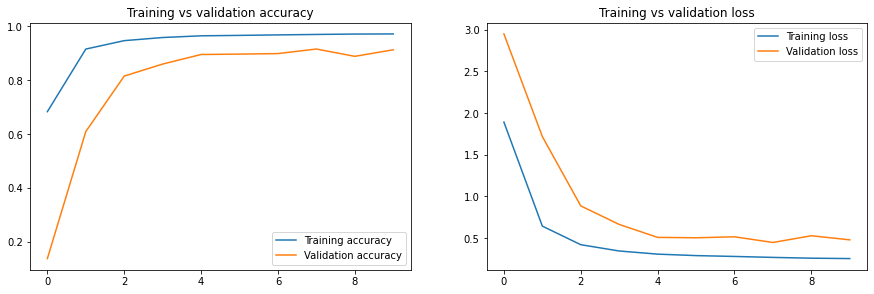

In [12]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [13]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


###### Loading the test image

In [14]:
test_image = tf.io.gfile.listdir('../input/devnagri-script-classification/Data/Test')
images = []
for f in test_image:
    img = tf.keras.preprocessing.image.load_img('../input/devnagri-script-classification/Data/Test/'+ f, color_mode = "rgb", target_size = (64,64))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    images.append(img)

In [15]:

pred = model.predict(tf.convert_to_tensor(images))

In [16]:
print(pred)

[[5.0936973e-07 1.5213635e-07 5.1002542e-07 ... 2.2610832e-06
  2.1166252e-06 3.4084435e-06]
 [5.7403359e-04 6.1480916e-04 6.7035777e-05 ... 1.8592250e-06
  1.6329536e-04 3.2827415e-05]
 [1.3615706e-05 1.5734562e-06 1.4769437e-07 ... 1.7469402e-08
  1.3929304e-07 1.5772457e-05]
 ...
 [8.4873150e-08 1.5993493e-08 3.6916754e-07 ... 3.8653317e-05
  4.4910415e-08 5.7660614e-08]
 [4.5965455e-05 9.4602069e-07 8.0820342e-07 ... 9.6267257e-08
  6.3421226e-06 3.8895232e-06]
 [1.9626601e-05 4.0290220e-07 2.5329881e-03 ... 5.5415735e-06
  1.9491918e-06 3.3031665e-06]]


In [17]:
pred = np.argmax(pred, axis = 1)

In [18]:
pred.shape

(13800,)

In [19]:
class_indices = dict([(value, key) for key, value in class_indices.items()])

pred = list(map(class_indices.get, pred))

In [20]:
submission1 = pd.DataFrame({'id': test_image,'category': pred})
submission1.head()


,id,category
0,9273.png,character_4_gha
1,9292.png,character_4_gha
2,11396.png,digit_1
3,4353.png,character_23_ba
4,7968.png,character_34_chhya


In [21]:
submission1.to_csv('classifier2.csv',index= False)